In [3]:
import numpy as np#linear algebra
import pandas as pd#data processing ,csv file I/O (eg: pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

In [5]:
for dirname,_,filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path,join(dirname,filename))

In [6]:
warnings.filterwarnings('ignore')

In [15]:
df=pd.read_csv("breast cancer.csv")
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
df.shape

(699, 11)

In [17]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
col_names=['Id','Clump_thickness','Uniformity_Cell_size','Uniformity_Cell_shape','Marginal_Adhesion','Single_Epithelial_Cell_size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses','Class']
df.columns=col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_size',
       'Uniformity_Cell_shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [19]:
df.head()

,Id,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [21]:
df.drop('Id',axis=1,inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_size         699 non-null    int64 
 2   Uniformity_Cell_shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [23]:
for var in df.columns:
    print(df[var].value_counts())

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_Cell_size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: Uniformity_Cell_shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_size, dtype: int64
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: Bland_Chromatin, dtype: int64
1     443
10     

In [24]:
df['Bare_Nuclei']=pd.to_numeric(df['Bare_Nuclei'],errors='coerce')

In [26]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_size             int64
Uniformity_Cell_shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [28]:
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_size            0
Uniformity_Cell_shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [29]:
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_size            0
Uniformity_Cell_shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [31]:
df['Bare_Nuclei'].value_counts()

1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: Bare_Nuclei, dtype: int64

In [32]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [33]:
df['Bare_Nuclei'].isna().sum()

16

In [34]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [35]:
df['Class'].value_counts()/np.float(len(df))

2    0.655222
4    0.344778
Name: Class, dtype: float64

In [37]:
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_size  Uniformity_Cell_shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

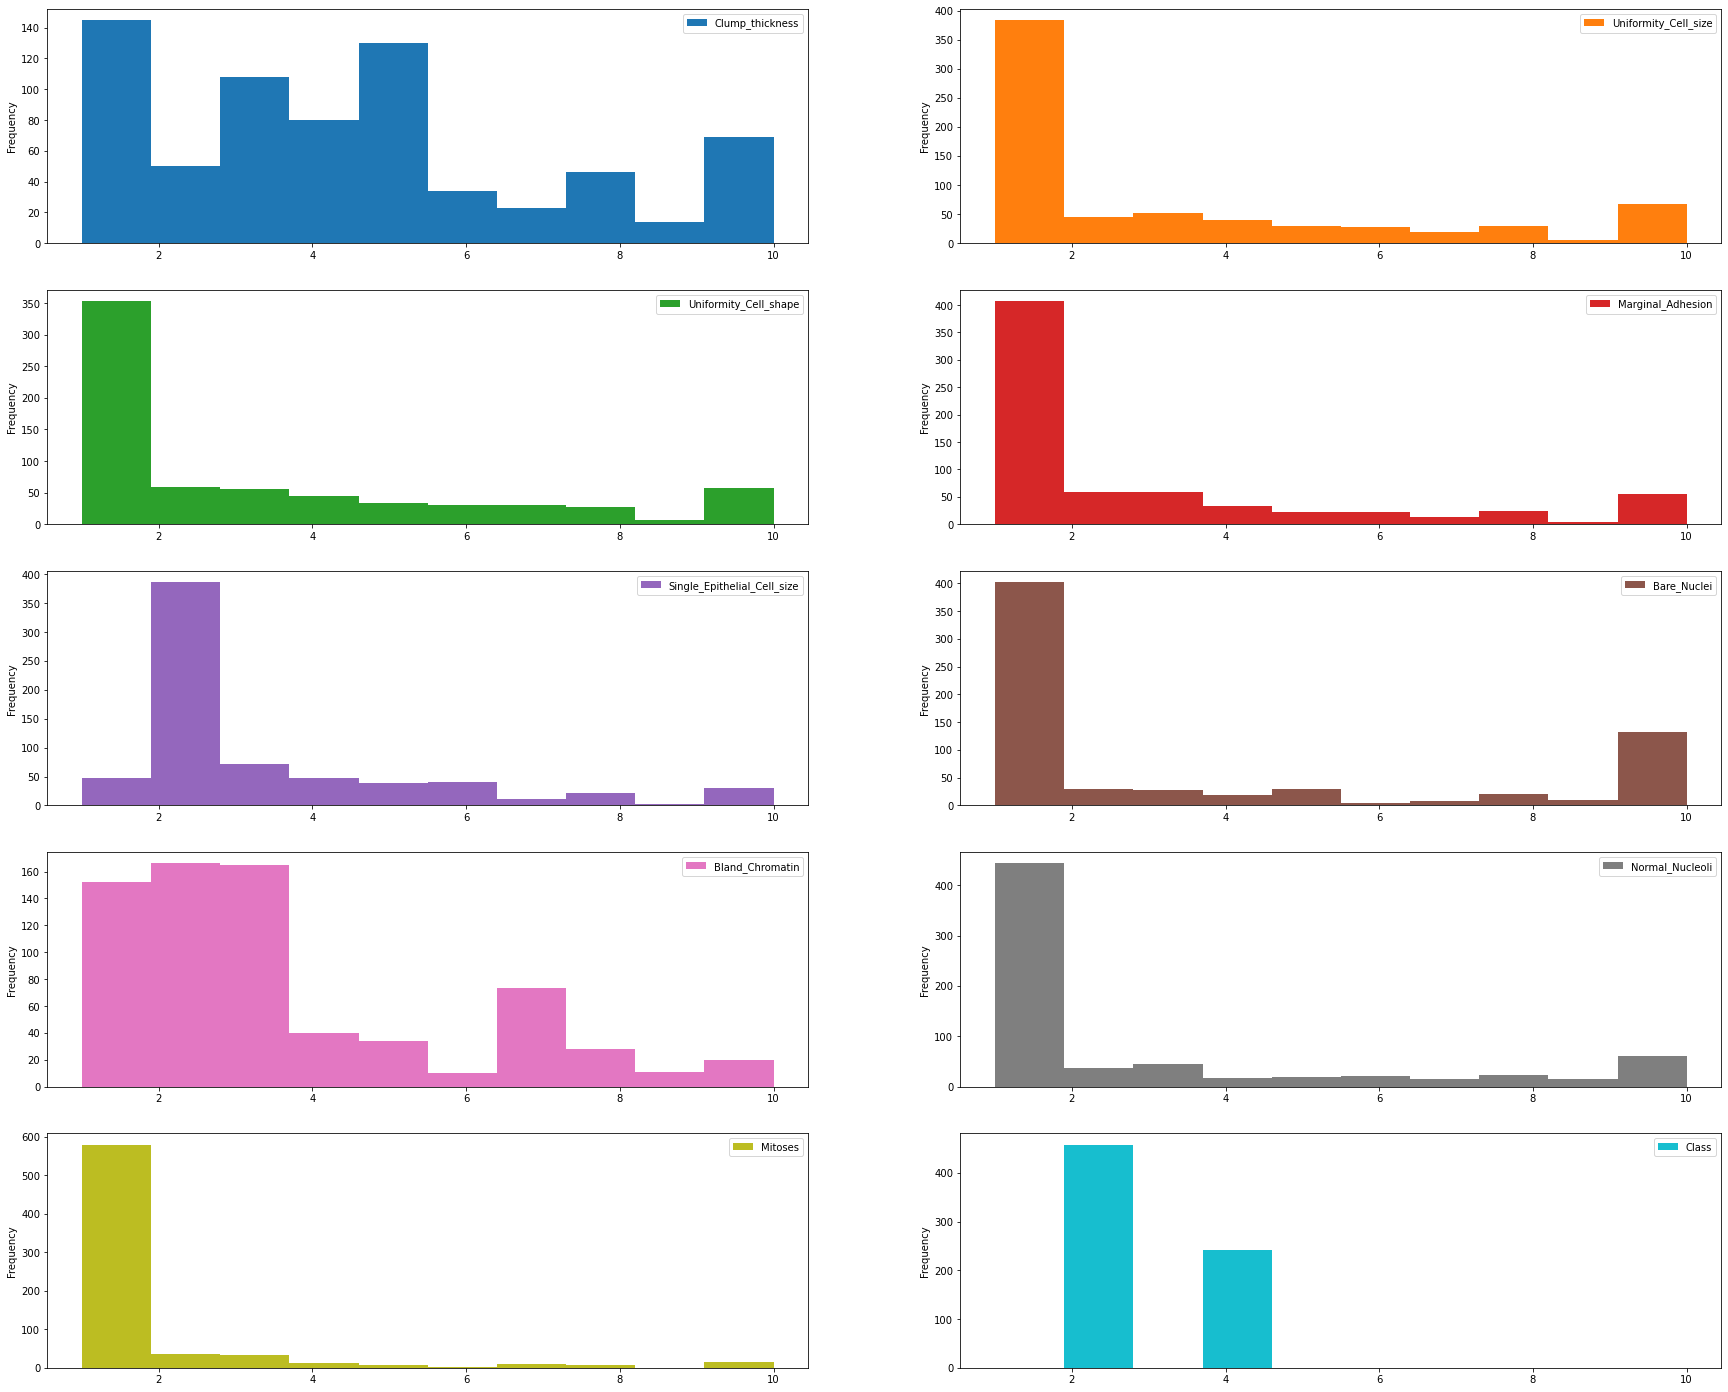

In [38]:
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist',bins=10,subplots=True,layout=(5,2),sharex=False,sharey=False)
plt.show()

In [40]:
correlation=df.corr()

In [41]:
correlation['Class'].sort_values(ascending=False)

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_shape          0.818934
Uniformity_Cell_size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

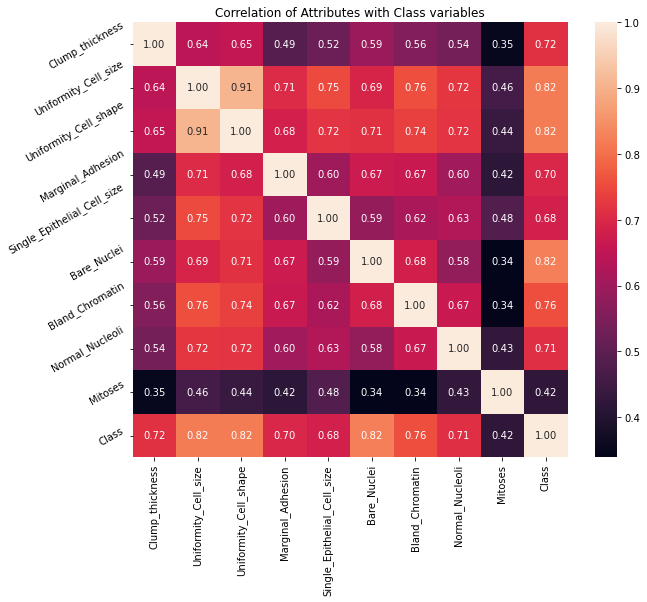

In [44]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variables')
a=sns.heatmap(correlation,square=True,annot=True,fmt='.2f',linecolor='white')
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set_yticklabels(a.get_yticklabels(),rotation=30)
plt.show()

In [45]:
x=df.drop(['Class'],axis=1)
y=df['Class']
x.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [47]:
x_train.shape,x_test.shape

((559, 9), (140, 9))

In [48]:
x_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_size             int64
Uniformity_Cell_shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

In [49]:
x_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_size            0
Uniformity_Cell_shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [50]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_size           0
Uniformity_Cell_shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [52]:
for col in x_train.columns:
    if x_train[col].isnull().mean()>0:
        print(col,round(x_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


In [53]:
for df1 in [x_train,x_test]:
    for col in x_train.columns:
        col_median=x_train[col].median()
        df1[col].fillna(col_median,inplace=True)

In [54]:
x_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_size           0
Uniformity_Cell_shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [55]:
x_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_size           0
Uniformity_Cell_shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [56]:
x_train.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [57]:
x_test.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


In [58]:
cols=x_train.columns

In [59]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [60]:
x_train=pd.DataFrame(x_train,columns=[cols])


In [61]:
x_test=pd.DataFrame(x_test,columns=[cols])


In [62]:
x_train.head()

,Clump_thickness,Uniformity_Cell_size,Uniformity_Cell_shape,Marginal_Adhesion,Single_Epithelial_Cell_size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


In [63]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred=knn.predict(x_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [66]:
knn.predict_proba(x_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [67]:
knn.predict_proba(x_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

In [69]:
print('Model accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score:0.9714


In [70]:
y_pred_train=knn.predict(x_train)

In [75]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


In [76]:
print('Training set score:{:.4f}'.format(knn.score(x_train,y_train)))

Training set score:0.9821


In [77]:
print('Test set score: {:.4f}'. format(knn.score(x_test, y_test)))

Test set score: 0.9714


In [78]:
y_test.value_counts()

2    85
4    55
Name: Class, dtype: int64

In [79]:
null_accuracy=(85/(85+55))
print('Null accuracy score:{0:0.4f}'.format(null_accuracy))

Null accuracy score:0.6071


In [82]:
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(x_train,y_train)
y_pred_5=knn_5.predict(x_test)
print('Model accuracy score with k=5:{0:0.4f}'.format(accuracy_score(y_test,y_pred_5)))

Model accuracy score with k=5:0.9714


In [83]:
knn_6=KNeighborsClassifier(n_neighbors=6)
knn_6.fit(x_train,y_train)
y_pred_6=knn_6.predict(x_test)
print('Model accuracy score with k=6:{0:0.4f}'.format(accuracy_score(y_test,y_pred_6)))

Model accuracy score with k=6:0.9786


In [85]:
knn_7=KNeighborsClassifier(n_neighbors=7)
knn_7.fit(x_train,y_train)
y_pred_7=knn_7.predict(x_test)
print('Model accuracy score with k=7:{0:0.4f}'.format(accuracy_score(y_test,y_pred_7)))

Model accuracy score with k=7:0.9786


In [86]:
knn_8=KNeighborsClassifier(n_neighbors=8)
knn_8.fit(x_train,y_train)
y_pred_8=knn_8.predict(x_test)
print('Model accuracy score with k=8:{0:0.4f}'.format(accuracy_score(y_test,y_pred_8)))

Model accuracy score with k=5:0.9786


In [87]:
knn_9=KNeighborsClassifier(n_neighbors=9)
knn_9.fit(x_train,y_train)
y_pred_9=knn_9.predict(x_test)
print('Model accuracy score with k=9:{0:0.4f}'.format(accuracy_score(y_test,y_pred_9)))

Model accuracy score with k=9:0.9714


In [89]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix\n\n',cm)
print('\nTrue Positives(TP)',cm[0,0])
print('\nTrue Neagtives(TN)',cm[1,1])
print('\nFalse Positives(FP)',cm[0,1])
print('\nFalse Negatives(FN)',cm[1,0])

confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) 83

True Neagtives(TN) 53

False Positives(FP) 2

False Negatives(FN) 2


In [91]:
cm_7=confusion_matrix(y_test,y_pred_7)
print('confusion matrix\n\n',cm_7)
print('\nTrue Positives(TP)',cm_7[0,0])
print('\nTrue Neagtives(TN)',cm_7[1,1])
print('\nFalse Positives(FP)',cm_7[0,1])
print('\nFalse Negatives(FN)',cm_7[1,0])

confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) 83

True Neagtives(TN) 54

False Positives(FP) 2

False Negatives(FN) 1


<AxesSubplot:>

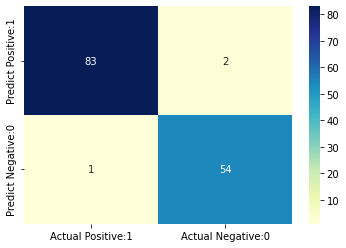

In [96]:
plt.figure(figsize=(6,4))

cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [98]:
print(classification_report(y_test,y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [99]:
(TP)=cm_7[0,0]
(TN)=cm_7[1,1]
(FP)=cm_7[0,1]
(FN)=cm_7[1,0]

In [100]:
classification_accuracy=(TP+TN)/float(TP+TN+FP+FN)
print('Classification accuracy:{0:0.4f}'.format(classification_accuracy))

Classificatiom accuracy:0.9786


In [101]:
classification_error=(FP+FN)/float(TP+TN+FP+FN)
print('Classification error:{0:0.4f}'.format(classification_error))

Classification error:0.0214


In [103]:
precision=TP/float(TP+FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


In [105]:
recall=TP/float(TP+FN)
print('Recall or Sensitivity: {0:0.4f}'.format(recall))

Recall or Sensitivity: 0.9881


In [106]:
true_positive_rate=TP/float(TP+FN)
print('true positive : {0:0.4f}'.format(true_positive_rate))

true positive : 0.9881


In [107]:
false_positive_rate=FP/float(FP+TN)
print('false positive : {0:0.4f}'.format(false_positive_rate))

false positive : 0.0357


In [109]:
specificity=TN/float(TN+FP)
print('specificity : {0:0.4f}'.format(specificity))

specificity : 0.9643


In [111]:
y_pred_prob = knn.predict_proba(x_test)[0:10]

y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [112]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])

y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [114]:
knn.predict_proba(x_test)[0:10, 1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333])

In [116]:
y_pred_1 = knn.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

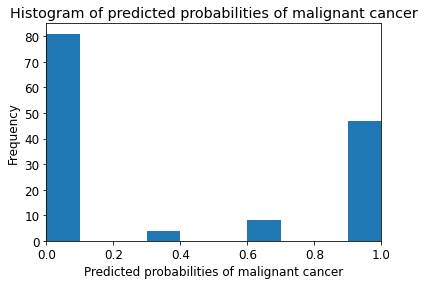

In [117]:

# adjust figure size
plt.figure(figsize=(6,4))


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

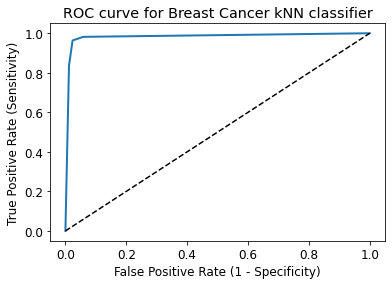

In [118]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Breast Cancer kNN classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [119]:
ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


In [121]:
Cross_validated_ROC_AUC = cross_val_score(knn_7, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


In [122]:
scores = cross_val_score(knn_7, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [123]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643
